# Detecting Change

A goal of Statistical Process Control (SPC) is to provide continuous monitoring of a process to verify it is "in control" or, in the alternative, determine if has become "out of control" and requiring corrective action.

CUSUM is a widely used statistical technique for detecting change in the time series of a single variable. In its most common implementation, after each new observation of the time series, CUSUM performs a recursive calculation testing the  hypothesis that the probability distribution of the times series remains unchanged. An alarm is raised if the hypothesis is rejected. The calculation is simple and the monitoring is generally effective in process applications.

## Synthetic data set

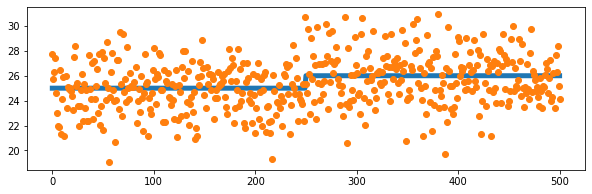

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# interpolated points
T = 500
tp = np.array([ 0, T/2, T/2, T])
zp = np.array([25,  25, 26, 26])

# create data set
t = np.linspace(0, T, T + 1)
z = np.interp(t, tp, xp)
x = z + np.random.normal(0, 2, size=len(t))

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(t, z, lw=5)
ax.plot(t, x, 'o')

## Some theory

Given a sequence of indepedent measurements $x_0, x_1, \dots, x_N$, we consider two hypotheses. Hypothesis $H_0$ is that there has been no change over this period, each measurement following a probability density function $p(x_n | \theta_0)$ where $\theta_0$ is deterministic parameter.  The probability density for the composite sequence is then

$$p_{X_N | H_0} = \prod_{n=0}^N p(x_n | \theta_0)$$

The alternative hypothesis $H_1$ is that an abrupt change occurred at unknown measurement $k$ 

$$p_{X_N | H_1} = \prod_{n=0}^{k-1} p(x_n | \theta_0) \prod_{n=k}^N p(x_n | \theta_1)$$

where $\theta_1$ is the value of the deterministic parameter following the change. There are two questions of interest:

* **Detection**: How do we decide between hypothesis $H_0$ and $H_1$?
* **Estimation**: How to we estimate when the change occurred, $k$?

## Maximizing log likelihood

Following the standard approaches of detection theory, the log-likelihood ratio

$$
\begin{align*}
L_{X_N} & = \ln\left(\frac{p_{X_N | H_0}}{p_{X_N | H_1}}\right) \\
& = \sum_{n = k}^N\ln\left(\frac{p(x_n | \theta_1)}{p(x_n | \theta_0)} \right)
\end{align*}
$$

If $k$ were known, then the decision to accept $H_1$ instead of $H_0$ would be based on a threshold test $L_{X_N} > H$ where $H$ is a threshold set by the user to tradeoff between sensitivity (i.e., avoid false negative errors) and false alarms (i.e, false positive errors). 

The rub is that $k$ is unknown. An empiricism is then to consider a "generalized" likelihood ratio

$$
\begin{align*}
G_{X_N} & = \max_{0\leq k\leq N} \sum_{n=k}^N \ln\left(\frac{p(x_n | \theta_1)}{p(x_n | \theta_0)} \right)
\end{align*}
$$

### Normal distributions

Let us assume the measurements follow a Gaussian distribution

$$
\begin{align*}
p(x_n|\theta) & = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x_n - \theta)^2}{2\sigma^2}}
\end{align*}
$$

Then the terms in the generalized likelihood ratio are given by

$$
\begin{align*}
\ln\left(\frac{p(x_n | \theta_1)}{p(x_n | \theta_0)} \right) & = -\frac{1}{2\sigma^2}\left[(x_n - \theta_1)^2 - (x_n - \theta_0)^2\right] \\
& = -\frac{1}{2\sigma^2}\left[x_n^2 - 2\theta_1x_n + \theta_1^2 - x_n^2 + 2\theta_0x_n - \theta_0^2 \right] \\
& = -\frac{1}{2\sigma^2}\left[ - 2(\theta_1 - \theta_0) x_n + (\theta_1 + \theta_0) (\theta_1 - \theta_0)\right] \\
\\
& = \frac{(\theta_1 - \theta_0)}{\sigma^2}\left[x_n - \frac{(\theta_1 + \theta_0)}{2}\right]
\end{align*}
$$




## CUSUM

The CUSUM (Cumulative Sum) chart is a widely used tool for statistical process control. The purpose of the chart is to detect change if a process variable has changed from nominal conditions. Given a sequence of process measurements $x_n$, the single-sided CUSUM statistic for detecting an increase in the mean value is given by

$$
\begin{align*}
S_0 & = 0 \\
S_{n+1} & = \max(0, S_{n} + x_n -\omega_n)
\end{align*}
$$

where $x_n$ is the most recent measurement and $\omega_n$ is a weighting coefficient. In practice $\omega_n = \bar{x} + \frac{\delta}{2}$ where $\bar{x}$ is the observed mean value of $x_n$ and $\delta$ is the minimum change to be detected. An alarm is raised when $S_n$ exceeds a threshold value $H$. Baaed on requirements of the application, $H$ is chosen as tradeoff between sensitivity and false alarms. 


24.418510205518167

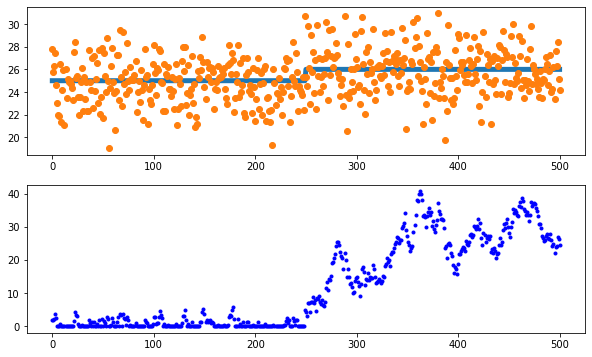

In [51]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].plot(t, z, lw=5)
ax[0].plot(t, x, 'o')

S = 0
x_mean = x.mean()
delta = 1.0
for tn, xn in zip(t, x):
    S = max(0, S + xn - x_mean - delta/2)
    ax[1].plot(tn, S, 'bo', ms=3)
S

ValueError: ignored

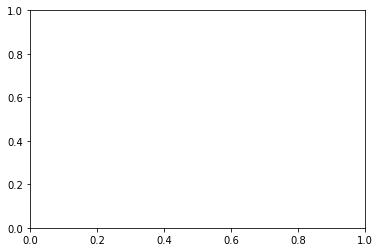

In [52]:
delta = 1.0
s = delta*(y - (y.mean() + y.mean() + delta)/2)
plt.plot(t, s)

ValueError: ignored

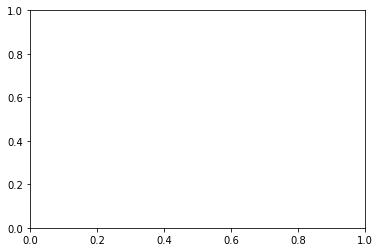

In [53]:
z = y - (2*y.mean() + 0)/2


plt.plot(t, np.flip(np.cumsum(np.flip(z))))

## Detecting change with convex programming 

Consider a model

$$
\begin{align*}
\xi_{n} & = \xi_{n-1} + \delta_n \\
x_n & = \xi_n + e_n
\end{align*}
$$

where $\delta_n$ is a sequence of incremental step changes and $e_n \sim N(0, \sigma^2)$ are a sequence zero-mean, normally distributed random measurement errors.

The $\delta_{n-k}$ represent process changes. The detection goal is determine there has been significant process change. For this purpose, we propose an optimization problem

$$
\begin{align*}
\min \| y - \bar{x} \|^2_2 + \lambda \| \delta\|_1
\end{align*}
$$



Given a record $y_n, y_{n-1}, \dots, y_{n-N}$, 

In [34]:
import cvxpy as cp

x_bar = cp.Variable()
objective = cp.Minimize(cp.norm(x_meas - x_bar, 2))
problem = cp.Problem(objective)
problem.solve()
x_bar.value

NameError: ignored

In [35]:
x_bar.value

In [36]:
L = np.tril(np.ones(shape=(tf + 1, tf + 1)))


import cvxpy as cp

x_bar = cp.Variable()
u = cp.Variable(shape=(tf + 1,))
constraint = [cp.norm(u, 1) <= 1.0]
objective = cp.Minimize(cp.norm(x_meas - L @ u - x_bar, 2))
problem = cp.Problem(objective, constraint)
problem.solve()
x_bar.value

plt.plot(u.value)

NameError: ignored

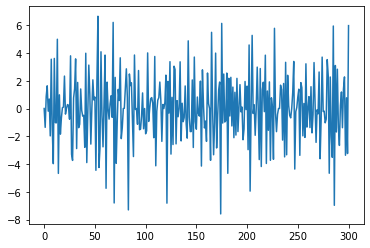